#### Importing Libraries

In [1]:
import requests
from bs4 import BeautifulSoup as soup
import numpy as np
import pandas as pd

In [2]:
#Test URL and send request to grab HTML Data
url = "https://www.worldometers.info/coronavirus/#countries"
html_page = requests.get(url,allow_redirects=True)
html_page.status_code

200

In [3]:
html_page.headers

{'Connection': 'Keep-Alive', 'Set-Cookie': 'mobile_detect=desktop; expires=Fri, 09-Jun-2023 20:29:32 GMT; Max-Age=2592000; path=/; secure', 'Content-Type': 'text/html; charset=UTF-8', 'Etag': '"958402217-1683750572;gz"', 'X-Litespeed-Cache': 'miss', 'Transfer-Encoding': 'chunked', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'Date': 'Wed, 10 May 2023 20:29:32 GMT', 'Server': 'LiteSpeed', 'Alt-Svc': 'quic=":443"; ma=2592000; v="43,46", h3-Q043=":443"; ma=2592000, h3-Q046=":443"; ma=2592000, h3-Q050=":443"; ma=2592000, h3-25=":443"; ma=2592000, h3-27=":443"; ma=2592000'}

In [4]:
html_page.text[:1000]

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<lin

In [5]:
#Beautiful Soup For Extracting Data Table
soup_response = soup(html_page.text,"html.parser")
soup_sample = soup(html_page.text[:1000],"html.parser")
soup_sample


<!DOCTYPE html>

<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>COVID - Coronavirus Statistics - Worldometer</title>
<meta content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates." name="description"/>
<!-- Favicon -->
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
<link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
	&lt;link rel="apple-touch-icon" sizes="</head></html>

In [6]:
sections = soup_response("div",id="maincounter-wrap")
sections

[<div id="maincounter-wrap" style="margin-top:15px">
 <h1>Coronavirus Cases:</h1>
 <div class="maincounter-number">
 <span style="color:#aaa">688,030,702        </span>
 </div>
 </div>,
 <div id="maincounter-wrap" style="margin-top:15px">
 <h1>Deaths:</h1>
 <div class="maincounter-number">
 <span>6,872,447</span>
 </div>
 </div>,
 <div id="maincounter-wrap" style="margin-top:15px;">
 <h1>Recovered:</h1>
 <div class="maincounter-number" style="color:#8ACA2B ">
 <span>660,455,964</span>
 </div>
 </div>]

In [7]:
for section in sections:
    print(section)
    print('---------------------------------------------------')

<div id="maincounter-wrap" style="margin-top:15px">
<h1>Coronavirus Cases:</h1>
<div class="maincounter-number">
<span style="color:#aaa">688,030,702        </span>
</div>
</div>
---------------------------------------------------
<div id="maincounter-wrap" style="margin-top:15px">
<h1>Deaths:</h1>
<div class="maincounter-number">
<span>6,872,447</span>
</div>
</div>
---------------------------------------------------
<div id="maincounter-wrap" style="margin-top:15px;">
<h1>Recovered:</h1>
<div class="maincounter-number" style="color:#8ACA2B ">
<span>660,455,964</span>
</div>
</div>
---------------------------------------------------


In [40]:
no_cases = sections[0].find("span").text.replace(" ","").replace(",","")
deaths = sections[1].find("span").text.replace(" ","").replace(",","")
Recovered = sections[2].find("span").text.replace(" ","").replace(",","")

print('Cases: ',no_cases)
print('Deaths: ',deaths)
print('Recovered: ',Recovered)


Cases:  688030702
Deaths:  6872447
Recovered:  660455964


### Extract the table

In [9]:
table = soup_response.find("table",id="main_table_countries_today").find("tbody")
rows  = table.find_all("tr",style="")

In [10]:
global_info =[]
for row in rows:
    columns = row.find_all("td") 
    country_info = [column.text.strip() for column in columns]
    global_info.append(country_info)
print(global_info[0:10])

[['', 'World', '688,030,702', '+43,276', '6,872,447', '+122', '660,455,964', '+65,139', '20,702,291', '39,060', '88,268', '881.7', '', '', '', 'All', '', '', '', '', '', ''], ['1', 'USA', '106,772,583', '', '1,162,474', '', '104,735,126', '', '874,983', '1,136', '318,910', '3,472', '1,178,843,558', '3,520,983', '334,805,269', 'North America', '3', '288', '0', '', '', '2,613'], ['2', 'India', '44,974,909', '', '531,722', '', '44,421,781', '', '21,406', 'N/A', '31,973', '378', '927,909,833', '659,668', '1,406,631,776', 'Asia', '31', '2,645', '2', '', '', '15'], ['3', 'France', '40,029,701', '+6,708', '166,862', '', '39,764,181', '+8,150', '98,658', '869', '610,353', '2,544', '271,490,188', '4,139,547', '65,584,518', 'Europe', '2', '393', '0', '102', '', '1,504'], ['4', 'Germany', '38,414,388', '', '173,544', '', '38,213,200', '+2,300', '27,644', 'N/A', '457,949', '2,069', '122,332,384', '1,458,359', '83,883,596', 'Europe', '2', '483', '1', '', '', '330'], ['5', 'Brazil', '37,511,921', ''

In [11]:
print(global_info[0:10])

[['', 'World', '688,030,702', '+43,276', '6,872,447', '+122', '660,455,964', '+65,139', '20,702,291', '39,060', '88,268', '881.7', '', '', '', 'All', '', '', '', '', '', ''], ['1', 'USA', '106,772,583', '', '1,162,474', '', '104,735,126', '', '874,983', '1,136', '318,910', '3,472', '1,178,843,558', '3,520,983', '334,805,269', 'North America', '3', '288', '0', '', '', '2,613'], ['2', 'India', '44,974,909', '', '531,722', '', '44,421,781', '', '21,406', 'N/A', '31,973', '378', '927,909,833', '659,668', '1,406,631,776', 'Asia', '31', '2,645', '2', '', '', '15'], ['3', 'France', '40,029,701', '+6,708', '166,862', '', '39,764,181', '+8,150', '98,658', '869', '610,353', '2,544', '271,490,188', '4,139,547', '65,584,518', 'Europe', '2', '393', '0', '102', '', '1,504'], ['4', 'Germany', '38,414,388', '', '173,544', '', '38,213,200', '+2,300', '27,644', 'N/A', '457,949', '2,069', '122,332,384', '1,458,359', '83,883,596', 'Europe', '2', '483', '1', '', '', '330'], ['5', 'Brazil', '37,511,921', ''

In [12]:
# Get Columns Names From Site
col_Names =['Country','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered'
            ,'NewRecovered','ActiveCases','Serious,Critical','TotCases/1M pop','Deaths/1M pop',
            'TotalTests','Tests/1M pop','Population']
len(col_Names)

14

In [13]:
df = pd.DataFrame(global_info)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,,World,"688,030,702","+43,276","6,872,447",+122,"660,455,964","+65,139","20,702,291","39,060",...,,,,All,,,,,,
1,1,USA,"106,772,583",,"1,162,474",,"104,735,126",,"874,983","1,136",...,"1,178,843,558","3,520,983","334,805,269",North America,3,288,0,,,"2,613"
2,2,India,"44,974,909",,"531,722",,"44,421,781",,"21,406",N/A,...,"927,909,833","659,668","1,406,631,776",Asia,31,"2,645",2,,,15
3,3,France,"40,029,701","+6,708","166,862",,"39,764,181","+8,150","98,658",869,...,"271,490,188","4,139,547","65,584,518",Europe,2,393,0,102,,"1,504"
4,4,Germany,"38,414,388",,"173,544",,"38,213,200","+2,300","27,644",N/A,...,"122,332,384","1,458,359","83,883,596",Europe,2,483,1,,,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,221,Tuvalu,"2,805",,,,,,"2,805",,...,,,"12,066",Australia/Oceania,4,,,,,"232,471"
215,222,Saint Helena,"2,166",,,,2,,"2,164",,...,,,"6,115",Africa,3,,,,,"353,884"
216,224,Montserrat,"1,403",,8,,"1,376",,19,,...,"17,762","3,577,442","4,965",North America,4,621,0,,,"3,827"
217,230,Tokelau,5,,,,,,5,,...,,,"1,378",Australia/Oceania,276,,,,,"3,628"


In [14]:
df.drop(columns=[0,15,16,17,18,19,20,21],inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,"688,030,702","+43,276","6,872,447",+122,"660,455,964","+65,139","20,702,291","39,060","88,268",881.7,,,
1,USA,"106,772,583",,"1,162,474",,"104,735,126",,"874,983","1,136","318,910","3,472","1,178,843,558","3,520,983","334,805,269"
2,India,"44,974,909",,"531,722",,"44,421,781",,"21,406",N/A,"31,973",378,"927,909,833","659,668","1,406,631,776"
3,France,"40,029,701","+6,708","166,862",,"39,764,181","+8,150","98,658",869,"610,353","2,544","271,490,188","4,139,547","65,584,518"
4,Germany,"38,414,388",,"173,544",,"38,213,200","+2,300","27,644",N/A,"457,949","2,069","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Tuvalu,"2,805",,,,,,"2,805",,"232,471",,,,"12,066"
215,Saint Helena,"2,166",,,,2,,"2,164",,"354,211",,,,"6,115"
216,Montserrat,"1,403",,8,,"1,376",,19,,"282,578","1,611","17,762","3,577,442","4,965"
217,Tokelau,5,,,,,,5,,"3,628",,,,"1,378"


In [15]:
df.columns=col_Names
df

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,World,"688,030,702","+43,276","6,872,447",+122,"660,455,964","+65,139","20,702,291","39,060","88,268",881.7,,,
1,USA,"106,772,583",,"1,162,474",,"104,735,126",,"874,983","1,136","318,910","3,472","1,178,843,558","3,520,983","334,805,269"
2,India,"44,974,909",,"531,722",,"44,421,781",,"21,406",N/A,"31,973",378,"927,909,833","659,668","1,406,631,776"
3,France,"40,029,701","+6,708","166,862",,"39,764,181","+8,150","98,658",869,"610,353","2,544","271,490,188","4,139,547","65,584,518"
4,Germany,"38,414,388",,"173,544",,"38,213,200","+2,300","27,644",N/A,"457,949","2,069","122,332,384","1,458,359","83,883,596"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Tuvalu,"2,805",,,,,,"2,805",,"232,471",,,,"12,066"
215,Saint Helena,"2,166",,,,2,,"2,164",,"354,211",,,,"6,115"
216,Montserrat,"1,403",,8,,"1,376",,19,,"282,578","1,611","17,762","3,577,442","4,965"
217,Tokelau,5,,,,,,5,,"3,628",,,,"1,378"


In [16]:
data = df.copy()

#### Save the extracted data to a csv file

In [17]:
data.to_csv('world_data_updated.csv',index=False)

### Perform Analysis on the File

In [18]:
world_data = pd.read_csv('world_data_updated.csv')
world_data.head()

,Country,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
0,World,"688,030,702","+43,276","6,872,447",122.0,"660,455,964","+65,139","20,702,291","39,060","88,268",881.7,NaN,NaN,NaN
1,USA,"106,772,583",NaN,"1,162,474",NaN,"104,735,126",NaN,"874,983","1,136","318,910","3,472","1,178,843,558","3,520,983","334,805,269"
2,India,"44,974,909",NaN,"531,722",NaN,"44,421,781",NaN,"21,406",NaN,"31,973",378,"927,909,833","659,668","1,406,631,776"
3,France,"40,029,701","+6,708","166,862",NaN,"39,764,181","+8,150","98,658",869,"610,353","2,544","271,490,188","4,139,547","65,584,518"
4,Germany,"38,414,388",NaN,"173,544",NaN,"38,213,200","+2,300","27,644",NaN,"457,949","2,069","122,332,384","1,458,359","83,883,596"


In [19]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           219 non-null    object 
 1   TotalCases        219 non-null    object 
 2   NewCases          26 non-null     object 
 3   TotalDeaths       216 non-null    object 
 4   NewDeaths         12 non-null     float64
 5   TotalRecovered    197 non-null    object 
 6   NewRecovered      33 non-null     object 
 7   ActiveCases       199 non-null    object 
 8   Serious,Critical  124 non-null    object 
 9   TotCases/1M pop   219 non-null    object 
 10  Deaths/1M pop     216 non-null    object 
 11  TotalTests        206 non-null    object 
 12  Tests/1M pop      206 non-null    object 
 13  Population        218 non-null    object 
dtypes: float64(1), object(13)
memory usage: 24.1+ KB


In [20]:
#get Nulls Percentage to decide columns to drop
world_data.isnull().sum() *100 / world_data.shape[0]

Country              0.000000
TotalCases           0.000000
NewCases            88.127854
TotalDeaths          1.369863
NewDeaths           94.520548
TotalRecovered      10.045662
NewRecovered        84.931507
ActiveCases          9.132420
Serious,Critical    43.378995
TotCases/1M pop      0.000000
Deaths/1M pop        1.369863
TotalTests           5.936073
Tests/1M pop         5.936073
Population           0.456621
dtype: float64

In [21]:
# Columns with high null values are to be dropped(higher than 70% for Example)
colmns_to_drop = ['NewCases','NewDeaths','NewRecovered']
world_data.drop(columns=colmns_to_drop,inplace=True)
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           219 non-null    object
 1   TotalCases        219 non-null    object
 2   TotalDeaths       216 non-null    object
 3   TotalRecovered    197 non-null    object
 4   ActiveCases       199 non-null    object
 5   Serious,Critical  124 non-null    object
 6   TotCases/1M pop   219 non-null    object
 7   Deaths/1M pop     216 non-null    object
 8   TotalTests        206 non-null    object
 9   Tests/1M pop      206 non-null    object
 10  Population        218 non-null    object
dtypes: object(11)
memory usage: 18.9+ KB


In [22]:
#Change Columns Type For Numerical Data....remove commas in numbers first
world_data['TotalCases'] = world_data['TotalCases'].str.replace(',', '').astype(int)
world_data['TotalDeaths'] = pd.to_numeric(world_data['TotalDeaths'].str.replace(',', ''), errors='coerce')
world_data['TotalRecovered'] =  pd.to_numeric(world_data['TotalRecovered'].str.replace(',', ''), errors='coerce')
world_data['ActiveCases'] =  pd.to_numeric(world_data['ActiveCases'].str.replace(',', ''), errors='coerce')
world_data['Serious,Critical'] =  pd.to_numeric(world_data['Serious,Critical'].str.replace(',', ''), errors='coerce')
world_data['TotCases/1M pop'] =  pd.to_numeric(world_data['TotCases/1M pop'].str.replace(',', ''), errors='coerce')
world_data['Deaths/1M pop'] =  pd.to_numeric(world_data['Deaths/1M pop'].str.replace(',', ''), errors='coerce')
world_data['TotalTests'] =  pd.to_numeric(world_data['TotalTests'].str.replace(',', ''), errors='coerce')
world_data['Tests/1M pop'] =  pd.to_numeric(world_data['Tests/1M pop'].str.replace(',', ''), errors='coerce')
world_data['Population'] =  pd.to_numeric(world_data['Population'].str.replace(',', ''), errors='coerce')

In [23]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           219 non-null    object 
 1   TotalCases        219 non-null    int32  
 2   TotalDeaths       216 non-null    float64
 3   TotalRecovered    197 non-null    float64
 4   ActiveCases       199 non-null    float64
 5   Serious,Critical  124 non-null    float64
 6   TotCases/1M pop   219 non-null    int64  
 7   Deaths/1M pop     216 non-null    float64
 8   TotalTests        206 non-null    float64
 9   Tests/1M pop      206 non-null    float64
 10  Population        218 non-null    float64
dtypes: float64(8), int32(1), int64(1), object(1)
memory usage: 18.1+ KB


In [24]:
# Now Start Filling Null Values for Other Columns
#Get a description For Numerical Columns To get OverView about the numbers
world_data.describe()

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
count,2.190000e+02,2.160000e+02,1.970000e+02,1.990000e+02,124.000000,219.000000,216.000000,2.060000e+02,2.060000e+02,2.180000e+02
mean,6.108367e+06,6.259248e+04,6.305142e+06,1.388044e+05,378.298387,194019.109589,1270.929167,3.313939e+07,2.154848e+06,3.572997e+07
std,4.733832e+07,4.781344e+05,4.788777e+07,1.470909e+06,3505.688068,198401.168853,1296.003154,1.210708e+08,3.692309e+06,1.419812e+08
min,5.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000,347.000000,3.000000,7.850000e+03,5.093000e+03,1.378000e+03
25%,3.076200e+04,2.342500e+02,2.784700e+04,9.150000e+01,4.000000,17186.000000,177.750000,3.604305e+05,1.895642e+05,5.476582e+05
50%,2.180910e+05,2.296000e+03,2.436010e+05,1.168000e+03,12.000000,123567.000000,863.500000,2.220024e+06,8.488210e+05,5.816378e+06
75%,1.289492e+06,1.420450e+04,1.383020e+06,1.082450e+04,46.000000,312060.500000,2072.750000,1.264590e+07,2.517450e+06,2.155032e+07
max,6.880307e+08,6.872447e+06,6.604560e+08,2.070229e+07,39060.000000,710283.000000,6537.000000,1.178844e+09,2.330212e+07,1.448471e+09


In [25]:
numerical_columns_with_nulls = ['TotalDeaths','TotalRecovered','ActiveCases','Serious,Critical','TotalTests','Tests/1M pop','Deaths/1M pop']
for colmn in numerical_columns_with_nulls:
    world_data[colmn] = world_data[colmn].fillna(world_data[colmn].median())

In [26]:
#Set World population to the sum of all Populations
#I Can Drop This row Later
world_data.iloc[0,-1]=world_data['Population'].sum()

In [27]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           219 non-null    object 
 1   TotalCases        219 non-null    int32  
 2   TotalDeaths       219 non-null    float64
 3   TotalRecovered    219 non-null    float64
 4   ActiveCases       219 non-null    float64
 5   Serious,Critical  219 non-null    float64
 6   TotCases/1M pop   219 non-null    int64  
 7   Deaths/1M pop     219 non-null    float64
 8   TotalTests        219 non-null    float64
 9   Tests/1M pop      219 non-null    float64
 10  Population        219 non-null    float64
dtypes: float64(8), int32(1), int64(1), object(1)
memory usage: 18.1+ KB


### Data is Now CLean and ready for Visualzations

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
#Drop First Row to avoid Errors in Data
vi_data = world_data.copy()
vi_data.drop(0,inplace=True)

In [30]:
# Get Top 20 Countries which Have Most : Deaths, Recovered, Active, Confirmed
country_Deaths = vi_data.loc[:,['Country','TotalDeaths']].sort_values(by='TotalDeaths',ascending=False,ignore_index=True).head(20)
country_Recovered = vi_data.loc[:,['Country','TotalRecovered']].sort_values(by='TotalRecovered',ascending=False,ignore_index=True).head(20)
country_Active = vi_data.loc[:,['Country','ActiveCases']].sort_values(by='ActiveCases',ascending=False,ignore_index=True).head(20)
country_Confirmed = vi_data.loc[:,['Country','TotalCases']].sort_values(by='TotalCases',ascending=False,ignore_index=True).head(20)

In [60]:
New_Numbers = {'Type':['Current No. Of Cases','Current No. Of Deaths','Current No. Of Recovered'],
               'Numbers':[no_cases,deaths,Recovered]}
New_Numbers = pd.DataFrame(New_Numbers)
px.histogram(New_Numbers,x='Type',y='Numbers',color='Type',text_auto='.10s',title='Real-Time numbers',template="plotly_dark")

In [31]:
#Draw Boxplot to look over The outliars
cases = ['TotalCases','TotalDeaths','ActiveCases','TotalRecovered']
px.box(vi_data[cases])

<AxesSubplot: >

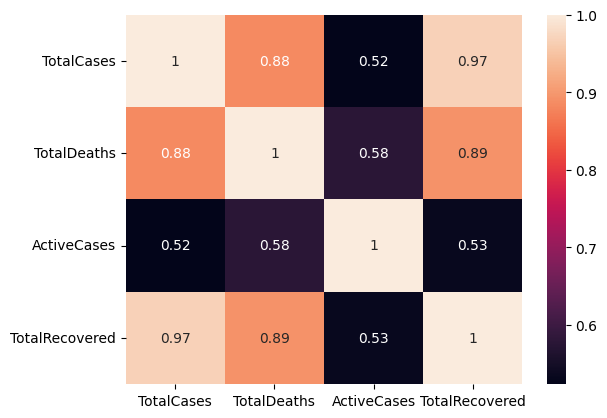

In [32]:
#Heat Map To Show Correlation between the columns
country_corr = vi_data[cases].corr()
sns.heatmap(country_corr,annot=True)

In [33]:
px.bar(country_Confirmed,x='Country',y='TotalCases',color='Country',text_auto='.3s',title='Top 20 Country Confirmed Cases',template="plotly_dark")

In [34]:
px.bar(country_Deaths,x='Country',y='TotalDeaths',color='Country',text_auto='.3s',title='Top 20 Country Deaths',template="plotly_dark")

In [35]:
px.bar(country_Recovered,x='Country',y='TotalRecovered',color='Country',text_auto='.3s',title='Top 20 Country Recovered Cases',template="plotly_dark")

In [36]:
px.bar(country_Active,x='Country',y='ActiveCases',color='Country',text_auto='.3s',title='Top 20 Country Active Cases',template="plotly_dark")